## import library

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## A Toy ResNet Architecture
In addition to models with multiple inputs and outputs, the functional API makes it easy to manipulate non-linear connectivity topologies -- these are models with layers that are not connected sequentially, which the Sequential API cannot handle.

A common use case for this is residual connections. Let's build a toy ResNet model for CIFAR10 to demonstrate 

In [2]:
inputs=keras.Input(shape=(32,32,3),name='img')

x=layers.Conv2D(32,3,activation='relu')(inputs)
x=layers.Conv2D(64,3,activation='relu')(x)
block_1_output=layers.MaxPooling2D(3)(x)

In [3]:
block_1_output

<tf.Tensor 'max_pooling2d/MaxPool:0' shape=(None, 9, 9, 64) dtype=float32>

In [4]:
x=layers.Conv2D(64,3,activation='relu',padding='same')(block_1_output)
x=layers.Conv2D(64,3,activation='relu',padding='same')(x)
block_2_ouput=layers.add([x,block_1_output])

In [5]:
block_2_ouput

<tf.Tensor 'add/add:0' shape=(None, 9, 9, 64) dtype=float32>

In [6]:
x=layers.Conv2D(64,3,activation='relu',padding='same')(block_2_ouput)
x=layers.Conv2D(64,3,activation='relu',padding='same')(x)
block_3_output=layers.add([x,block_2_ouput])


In [7]:
block_3_output

<tf.Tensor 'add_1/add:0' shape=(None, 9, 9, 64) dtype=float32>

In [8]:
x=layers.Conv2D(64,3,activation='relu')(block_3_output)
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(256,activation='relu')(x)
x=layers.Dropout(0.5)(x)
outputs=layers.Dense(10,activation='softmax')(x)

## Create ResNet Model

In [9]:
model=keras.Model(inputs=inputs,outputs=outputs,name='ResNet')

In [10]:
model.summary()

Model: "ResNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 9, 9, 64)     0           conv2d_1[0][0]                   
_____________________________________________________________________________________________

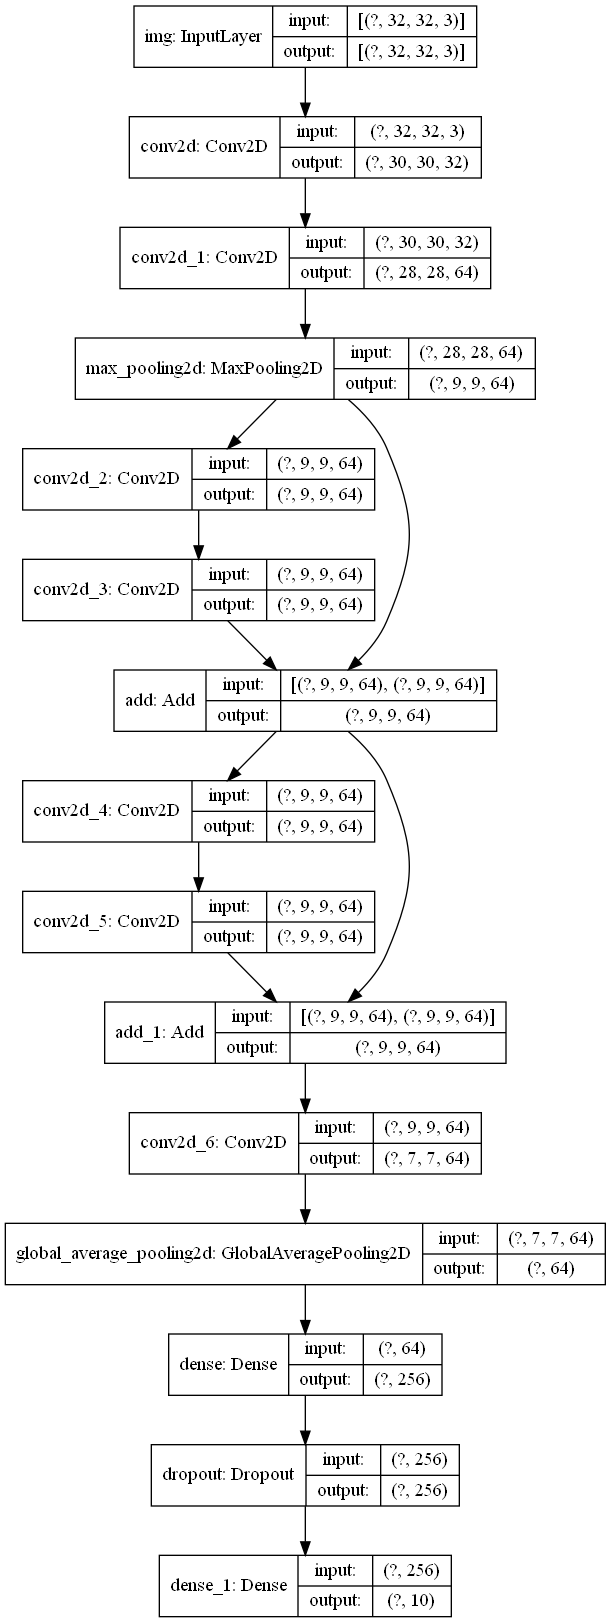

In [11]:
keras.utils.plot_model(model,'Toy_ResNet.png',show_shapes=True)

## Load  Dataset

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [14]:
x_train=x_train/255.0
x_test=x_test/255.0
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [15]:
y_test[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

## Compile and Train Model

In [20]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
history=model.fit(x_train,y_train,batch_size=32,epochs=10,validation_split=0.21)

Epoch 1/10
1235/1235 [==============================] - 117s 94ms/step - loss: 1.8002 - accuracy: 0.3222 - val_loss: 1.4714 - val_accuracy: 0.4462
Epoch 2/10
1235/1235 [==============================] - 128s 104ms/step - loss: 1.3376 - accuracy: 0.5198 - val_loss: 1.1373 - val_accuracy: 0.5930
Epoch 3/10
1235/1235 [==============================] - 132s 107ms/step - loss: 1.1121 - accuracy: 0.6081 - val_loss: 1.3776 - val_accuracy: 0.5543
Epoch 4/10
1235/1235 [==============================] - 131s 106ms/step - loss: 0.9723 - accuracy: 0.6586 - val_loss: 1.1407 - val_accuracy: 0.5959
Epoch 5/10
1235/1235 [==============================] - 123s 100ms/step - loss: 0.8763 - accuracy: 0.6984 - val_loss: 0.8765 - val_accuracy: 0.7015
Epoch 6/10
1235/1235 [==============================] - 120s 97ms/step - loss: 0.8127 - accuracy: 0.7281 - val_loss: 0.8030 - val_accuracy: 0.7221
Epoch 7/10
1235/1235 [==============================] - 125s 101ms/step - loss: 0.7756 - accuracy: 0.7397 - val_lo

## Evaluate Model

In [23]:
test_loss,test_score=model.evaluate(x_test,y_test)
print(test_loss)
print(test_score*100)

313/313 [==============================] - 5s 17ms/step - loss: 0.9495 - accuracy: 0.7059
0.9494942426681519
70.59000134468079


## Saved Model

In [24]:
model.save('toy_resnet.h5')